In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('mobiletrain.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Changing Pandas Dataframe to Array

In [33]:
X = df.iloc[:,:20].values
y = df.iloc[:,20:21].values

# Normalizing the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized Data: ')
print(X[0])

#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array: ')
print(y[0:5])

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Normalized Data: 
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
One hot encoded array: 
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(16,input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [36]:
# To Visualize the neural network 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_14 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1800/1800 [==============================] - 0s 248us/step - loss: 1.3854 - accuracy: 0.2878
Epoch 2/100
1800/1800 [==============================] - 0s 39us/step - loss: 1.3286 - accuracy: 0.3461
Epoch 3/100
1800/1800 [==============================] - 0s 43us/step - loss: 1.2769 - accuracy: 0.4006
Epoch 4/100
1800/1800 [==============================] - 0s 40us/step - loss: 1.2172 - accuracy: 0.4433
Epoch 5/100
1800/1800 [==============================] - 0s 40us/step - loss: 1.1444 - accuracy: 0.4889
Epoch 6/100
1800/1800 [==============================] - 0s 51us/step - loss: 1.0651 - accuracy: 0.5417
Epoch 7/100
1800/1800 [==============================] - 0s 38us/step - loss: 0.9845 - accuracy: 0.5711
Epoch 8/100
1800/1800 [==============================] - 0s 42us/step - loss: 0.9091 - accuracy: 0.5950
Epoch 9/100
1800/1800 [==============================] - 0s 37us/step - loss: 0.8421 - accuracy: 0.6300
Epoch 10/100
1800/1800 [==============================] - 0s 48

1800/1800 [==============================] - 0s 27us/step - loss: 0.0724 - accuracy: 0.9850
Epoch 80/100
1800/1800 [==============================] - 0s 38us/step - loss: 0.0718 - accuracy: 0.9850
Epoch 81/100
1800/1800 [==============================] - 0s 36us/step - loss: 0.0705 - accuracy: 0.9839
Epoch 82/100
1800/1800 [==============================] - 0s 37us/step - loss: 0.0693 - accuracy: 0.9872
Epoch 83/100
1800/1800 [==============================] - 0s 43us/step - loss: 0.0670 - accuracy: 0.9867
Epoch 84/100
1800/1800 [==============================] - 0s 28us/step - loss: 0.0662 - accuracy: 0.9872
Epoch 85/100
1800/1800 [==============================] - 0s 129us/step - loss: 0.0643 - accuracy: 0.9894
Epoch 86/100
1800/1800 [==============================] - 0s 64us/step - loss: 0.0640 - accuracy: 0.9878
Epoch 87/100
1800/1800 [==============================] - 0s 44us/step - loss: 0.0625 - accuracy: 0.9894
Epoch 88/100
1800/1800 [==============================] - 0s 47us/s

In [39]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [40]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [41]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 88.0


In [42]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 98us/step - loss: 0.0497 - accuracy: 0.9944 - val_loss: 0.2634 - val_accuracy: 0.8750
Epoch 2/100
1800/1800 [==============================] - 0s 63us/step - loss: 0.0500 - accuracy: 0.9928 - val_loss: 0.2753 - val_accuracy: 0.8750
Epoch 3/100
1800/1800 [==============================] - 0s 62us/step - loss: 0.0483 - accuracy: 0.9950 - val_loss: 0.2744 - val_accuracy: 0.8750
Epoch 4/100
1800/1800 [==============================] - 0s 50us/step - loss: 0.0485 - accuracy: 0.9944 - val_loss: 0.2625 - val_accuracy: 0.8850
Epoch 5/100
1800/1800 [==============================] - 0s 51us/step - loss: 0.0473 - accuracy: 0.9939 - val_loss: 0.2676 - val_accuracy: 0.8800
Epoch 6/100
1800/1800 [==============================] - 0s 57us/step - loss: 0.0459 - accuracy: 0.9961 - val_loss: 0.2655 - val_accuracy: 0.8800
Epoch 7/100
1800/1800 [==============================] - 0s 83us/step - loss:

1800/1800 [==============================] - 0s 61us/step - loss: 0.0204 - accuracy: 0.9994 - val_loss: 0.3510 - val_accuracy: 0.9000
Epoch 57/100
1800/1800 [==============================] - 0s 58us/step - loss: 0.0198 - accuracy: 0.9994 - val_loss: 0.3547 - val_accuracy: 0.9000
Epoch 58/100
1800/1800 [==============================] - 0s 89us/step - loss: 0.0198 - accuracy: 0.9989 - val_loss: 0.3641 - val_accuracy: 0.9000
Epoch 59/100
1800/1800 [==============================] - 0s 45us/step - loss: 0.0191 - accuracy: 0.9994 - val_loss: 0.3596 - val_accuracy: 0.9000
Epoch 60/100
1800/1800 [==============================] - 0s 58us/step - loss: 0.0190 - accuracy: 0.9994 - val_loss: 0.3497 - val_accuracy: 0.9000
Epoch 61/100
1800/1800 [==============================] - 0s 66us/step - loss: 0.0186 - accuracy: 0.9994 - val_loss: 0.3630 - val_accuracy: 0.9000
Epoch 62/100
1800/1800 [==============================] - 0s 41us/step - loss: 0.0179 - accuracy: 0.9994 - val_loss: 0.3634 - val_a

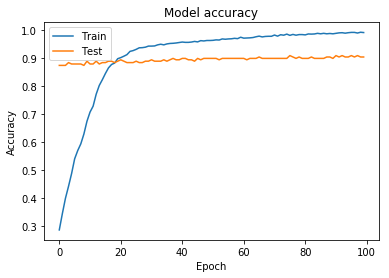

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

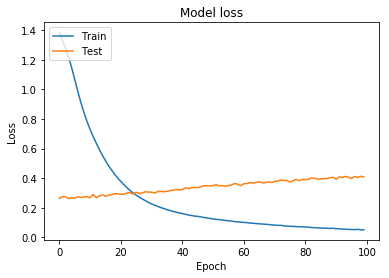

In [44]:
plt.plot(history.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()